# 作業

實作本篇提到的三大概念

- 翻轉：實作上下左右的翻轉
- 縮放：比較鄰近差值與雙立方插值 (或雙線性插值) 的圖片品質
- 平移：建立 Translation Transformation Matrix 來做平移

In [9]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

img_path = '../Part01/lena.png'
img = cv2.imread(img_path)

## 上下左右翻轉圖片

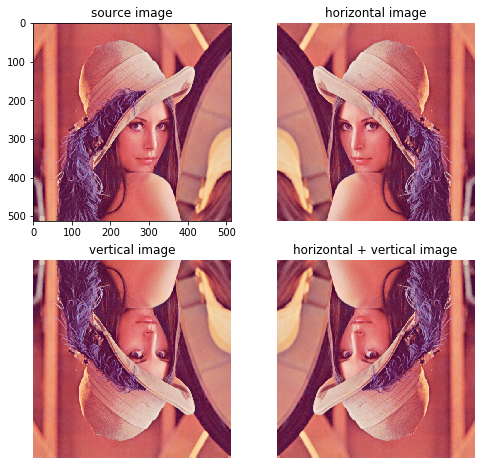

In [13]:
# 水平翻轉 (horizontal)
img_hflip = img[:, ::-1, :]

# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]

# 水平 + 垂直翻轉
img_hvflip = img[::-1, ::-1, :]

# 組合 + 顯示圖片
hflip = np.hstack((img, img_hflip))
vflip = np.hstack((img_vflip, img_hvflip))
img_flip = np.vstack((hflip, vflip))

#while True:
#    cv2.imshow('flip image', img_flip)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
plt.figure(num='01',figsize=(8,8))

#OpenCV is BGR Cover to Plt RGB
b,g,r = cv2.split(img)  
img_ = cv2.merge([r,g,b])  
b,g,r = cv2.split(img_hflip)  
img_hflip = cv2.merge([r,g,b])
b,g,r = cv2.split(img_vflip)  
img_vflip = cv2.merge([r,g,b])
b,g,r = cv2.split(img_hvflip)  
img_hvflip = cv2.merge([r,g,b])

plt.subplot(2,2,1)
plt.title('source image')   #第一幅图片标题
plt.imshow(img_)

plt.subplot(2,2,2)     #第二个子图
plt.title('horizontal image')   #第二幅图片标题
plt.imshow(img_hflip)
plt.axis('off')     #不显示坐标尺寸

plt.subplot(2,2,3)     #第三个子图
plt.title('vertical image')   #第三幅图片标题
plt.imshow(img_vflip)
plt.axis('off')     #不显示坐标尺寸

plt.subplot(2,2,4)     #第四个子图
plt.title('horizontal + vertical image')   #第四幅图片标题
plt.imshow(img_hvflip)
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口

## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.0009975433349609375
INTER_CUBIC zoom cost 0.0029916763305664062


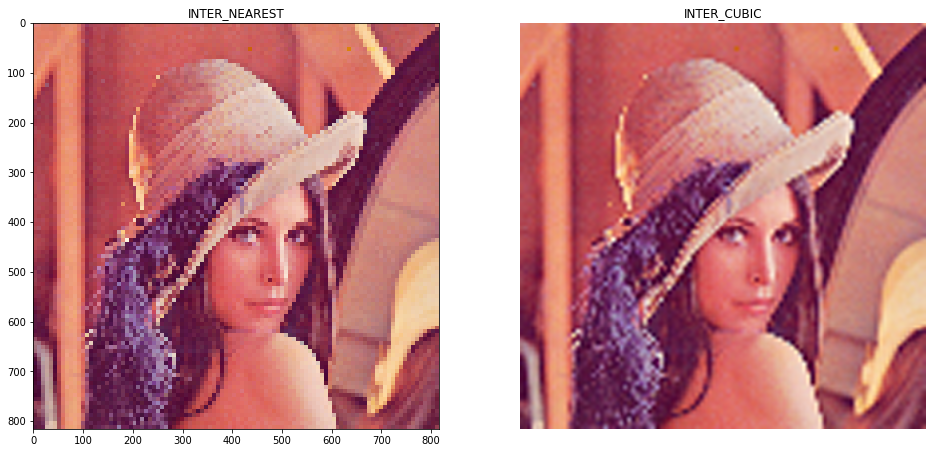

In [16]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 雙立方差補 scale + 計算花費時間
start_time = time.time()
img_cubic_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
print('INTER_CUBIC zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
#img_zoom = np.hstack((img_area_scale, img_cubic_scale))
#while True:
#    cv2.imshow('zoom image', img_zoom)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break
plt.figure(num='02',figsize=(16,16))

#OpenCV is BGR Cover to Plt RGB
b,g,r = cv2.split(img_area_scale)  
img_area_scale = cv2.merge([r,g,b])  
b,g,r = cv2.split(img_cubic_scale)  
img_cubic_scale = cv2.merge([r,g,b])

plt.subplot(1,2,1)
plt.title('INTER_NEAREST')   #第一幅图片标题
plt.imshow(img_area_scale)

plt.subplot(1,2,2)     #第二个子图
plt.title('INTER_CUBIC')   #第二幅图片标题
plt.imshow(img_cubic_scale)
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口

## 平移幾何轉換

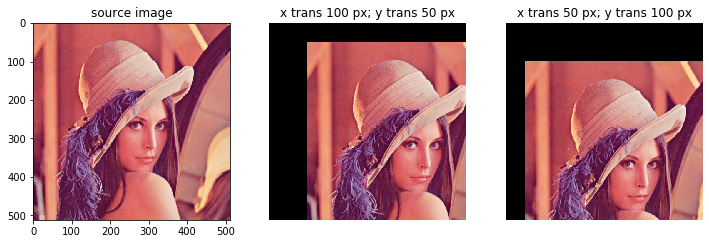

In [24]:
# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M1 = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32)

# 設定 translation transformation matrix
# x 平移 50 pixel; y 平移 100 pixel
M2 = np.array([[1, 0, 50],
              [0, 1, 100]], dtype=np.float32)
shift_img1 = cv2.warpAffine(img, M1, (img.shape[1], img.shape[0]))
shift_img2 = cv2.warpAffine(img, M2, (img.shape[1], img.shape[0]))
# 組合 + 顯示圖片
#img_shift = np.hstack((img, shift_img))
#while True:
#    cv2.imshow('shift image', img_shift)
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

plt.figure(num='03',figsize=(12,12))

#OpenCV is BGR Cover to Plt RGB
b,g,r = cv2.split(shift_img1)  
shift_img1 = cv2.merge([r,g,b])  
b,g,r = cv2.split(shift_img2)  
shift_img2 = cv2.merge([r,g,b])

plt.subplot(1,3,1)
plt.title('source image')   #第一幅图片标题
plt.imshow(img_)

plt.subplot(1,3,2)
plt.title('x trans 100 px; y trans 50 px')   #第一幅图片标题
plt.imshow(shift_img1)
plt.axis('off')     #不显示坐标尺寸

plt.subplot(1,3,3)
plt.title('x trans 50 px; y trans 100 px')   #第一幅图片标题
plt.imshow(shift_img2)
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口